In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
import seaborn as sns

In [3]:
# Import CSV file
data_path  = 'apr20_rent_33_col_new.csv'
RentList   = pd.read_csv(data_path)
to_del_cols= [0,3,4,5,7,10,12,14,15,17,18,19,21,22,26,27,29]
RentList.drop(RentList.columns[to_del_cols],axis = 1,inplace=True)
RentList.set_axis ([ 'Region','Heating Type','Construction Year','Firing Type','Exclusive Expose','Cellar','Living Space','Condition', 'Room Numbers','Immotype','Telekom Prod. Availab.','Barrier Free','Living Space Range','Telekom Offer','Telekom Upload Speed','Telekom Download Speed','Total Rent'],axis = 1,inplace=True)
RentList = RentList.sort_values(by ='Region')
RentList= RentList[RentList['Total Rent'] != 0 ]
RentList= RentList[RentList['Total Rent'] > 300 ]
RentList= RentList[RentList['Total Rent'].notna()]
RentList = RentList.reset_index(drop=True)
RentList


,Region,Heating Type,Construction Year,Firing Type,Exclusive Expose,Cellar,Living Space,Condition,Room Numbers,Immotype,Telekom Prod. Availab.,Barrier Free,Living Space Range,Telekom Offer,Telekom Upload Speed,Telekom Download Speed,Total Rent
0,Baden_Württemberg,central_heating,1978.0,oil,NaN,n,107.00,well_kept,4.0,wohnung_miete,NaN,n,5,NaN,NaN,NaN,1330.0
1,Baden_Württemberg,district_heating,1987.0,no_information,False,n,20.00,mint_condition,1.0,wohnung_miete,True,n,1,ONE_YEAR_FREE,10 MBit/s,50 MBit/s,550.0
2,Baden_Württemberg,floor_heating,2019.0,district_heating,False,y,61.45,first_time_use,2.0,wohnung_miete,False,y,3,NaN,NaN,NaN,703.0
3,Baden_Württemberg,NaN,NaN,no_information,False,y,80.00,first_time_use_after_refurbishment,3.0,wohnung_miete,True,n,3,ONE_YEAR_FREE,40 MBit/s,100 MBit/s,1000.0
4,Baden_Württemberg,heat_pump,2012.0,no_information,False,y,73.00,well_kept,3.5,wohnung_miete,True,n,3,ONE_YEAR_FREE,40 MBit/s,100 MBit/s,970.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68737,Thüringen,central_heating,NaN,no_information,False,y,70.00,modernized,3.0,wohnung_miete,True,n,3,ONE_YEAR_FREE,40 MBit/s,100 MBit/s,1000.0
68738,Thüringen,central_heating,1977.0,district_heating,False,y,68.91,refurbished,3.0,wohnung_miete,True,n,3,ONE_YEAR_FREE,40 MBit/s,100 MBit/s,444.0
68739,Thüringen,central_heating,1901.0,gas,False,y,61.00,no_information,1.0,wohnung_miete,True,n,3,ONE_YEAR_FREE,40 MBit/s,100 MBit/s,582.0
68740,Thüringen,central_heating,1978.0,oil,False,y,62.00,modernized,3.0,wohnung_miete,True,n,3,ONE_YEAR_FREE,40 MBit/s,100 MBit/s,420.0


In [4]:
# Extract state names from CSV
Unique_States = RentList['Region'].unique()
# Unique_States = Unique_States.tolist()
Unique_States

array(['Baden_Württemberg', 'Bayern', 'Berlin', 'Brandenburg', 'Bremen',
       'Hamburg', 'Hessen', 'Mecklenburg_Vorpommern', 'Niedersachsen',
       'Nordrhein_Westfalen', 'Rheinland_Pfalz', 'Saarland', 'Sachsen',
       'Sachsen_Anhalt', 'Schleswig_Holstein', 'Thüringen'], dtype=object)

In [5]:
# Fucntion to seperate the data based on the state name 

def states(Name):
          Ind_Values = RentList[RentList['Region']== Name].index.values
          Current_State = RentList.iloc[Ind_Values,:]
          return Current_State
    
                
                    

In [6]:
# Comparison of the states with mean total rent 

def get_mean_max_min(header,header2):
            Mean_Val = states(header).loc[:,header2].mean()
            Max_Val = states(header).loc[:,header2].max()
            Min_Val = states(header).loc[:,header2].min()
            Val_List = [Min_Val, Mean_Val,Max_Val]
            return Val_List


Text(0.5, 1.0, 'Min, Avarage and Max Rent Price Distribution')

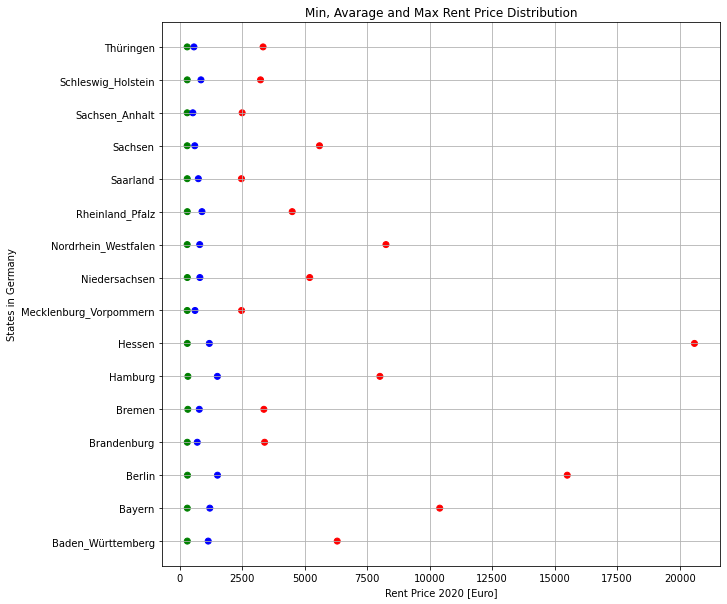

In [22]:

for i in Unique_States:
    ErrorBar = get_mean_max_min(i,'Total Rent')
    plt.scatter(ErrorBar,[i, i ,i],color=['green','blue','red'] )
    




plt.rcParams["figure.figsize"]=10,10
plt.grid()
plt.xlabel("Rent Price 2020 [Euro]")   
plt.ylabel("States in Germany")   
plt.title('Min, Avarage and Max Rent Price Distribution')




In [31]:
#Extract room numbers from CSV
Unique_RoomNo = RentList['Room Numbers'].unique()
Unique_RoomNo = sorted(Unique_RoomNo.tolist())
Unique_RoomNo = Unique_RoomNo [0:-1]
Unique_RoomNo


[1.0,
 1.2,
 1.5,
 2.0,
 2.1,
 2.2,
 2.5,
 3.0,
 3.5,
 4.0,
 4.5,
 5.0,
 5.5,
 6.0,
 6.5,
 7.0,
 7.5,
 8.0,
 8.5,
 9.0,
 10.0,
 11.0,
 12.0,
 13.0,
 15.0]

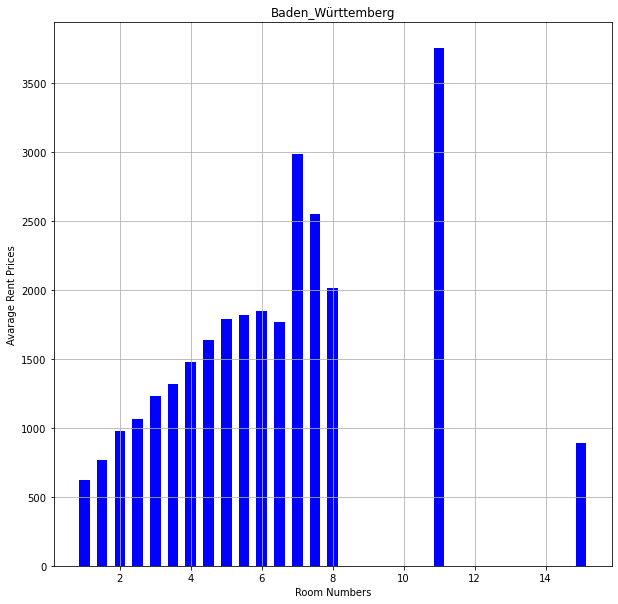

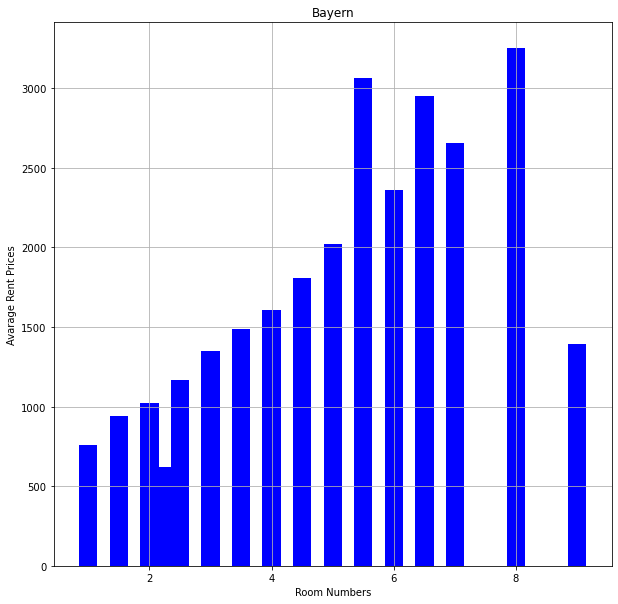

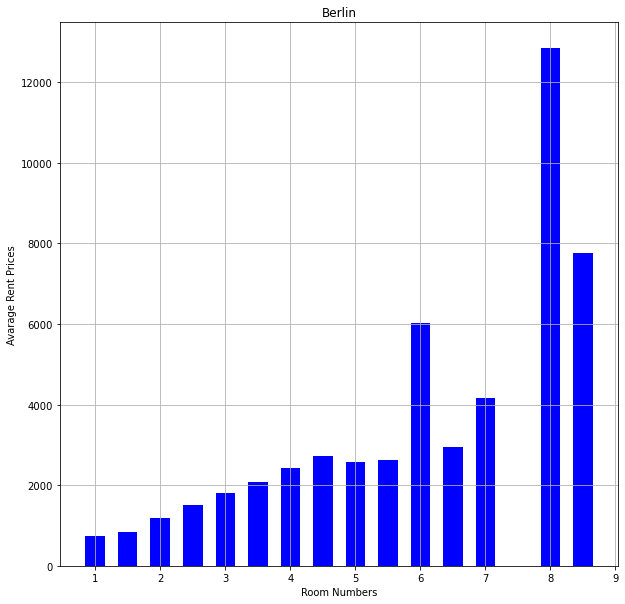

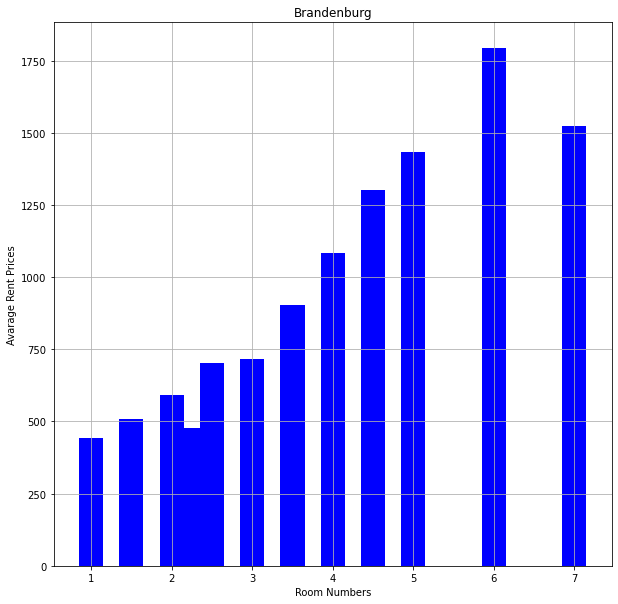

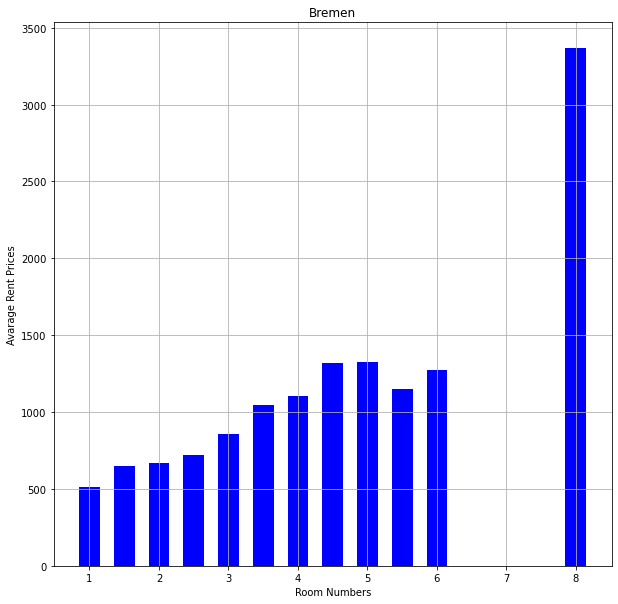

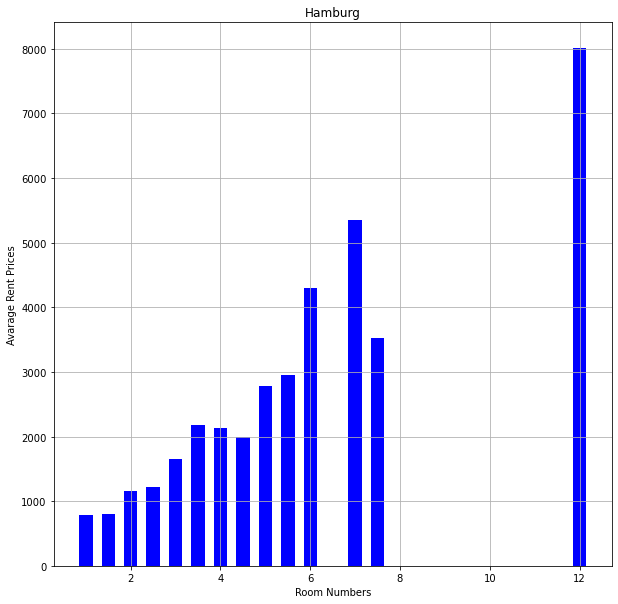

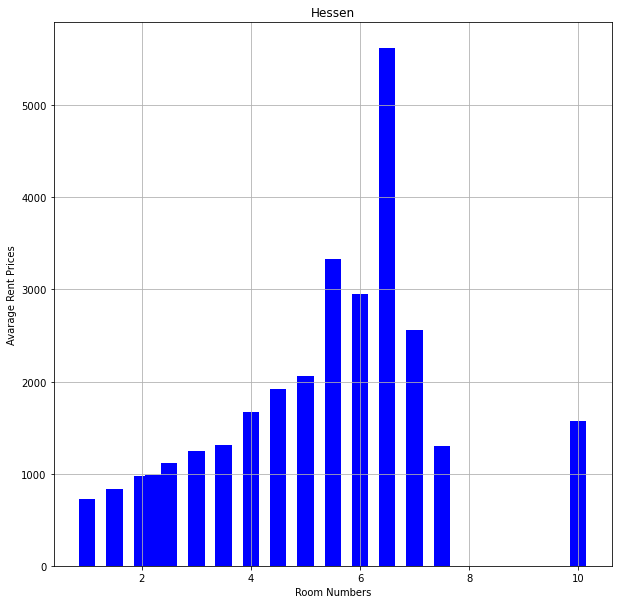

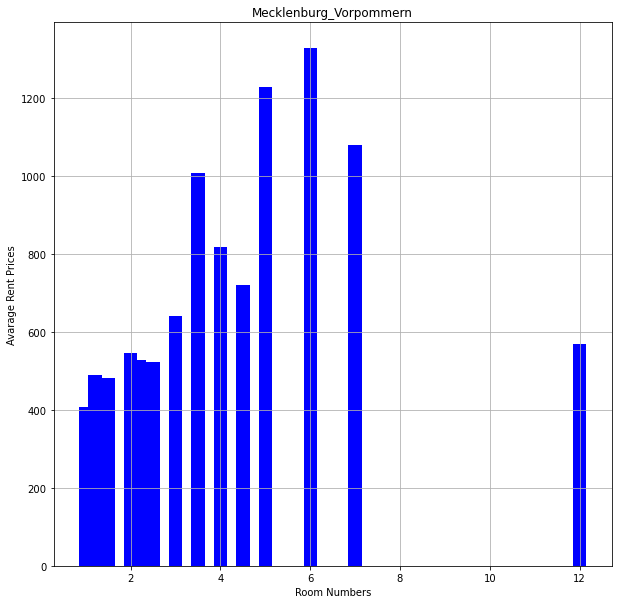

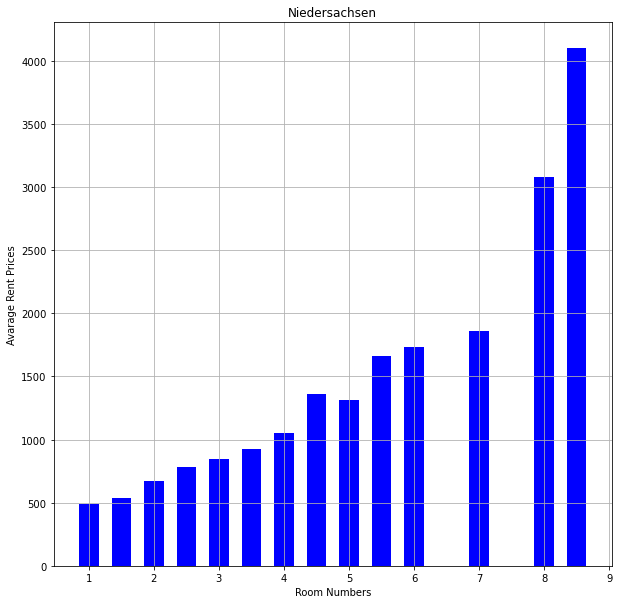

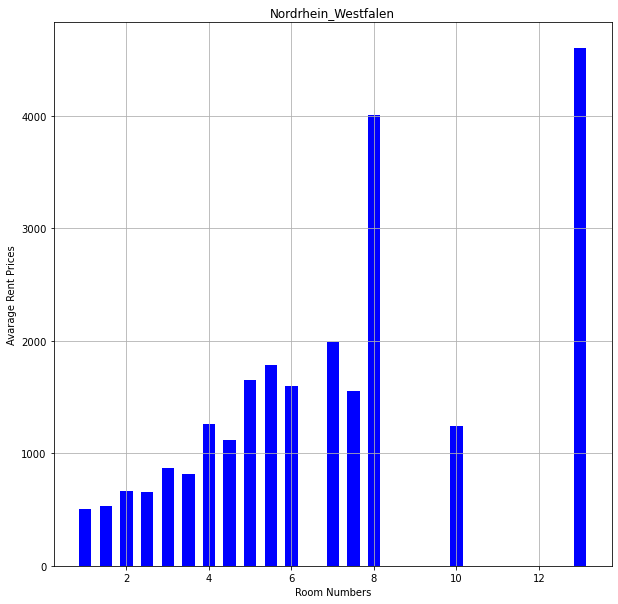

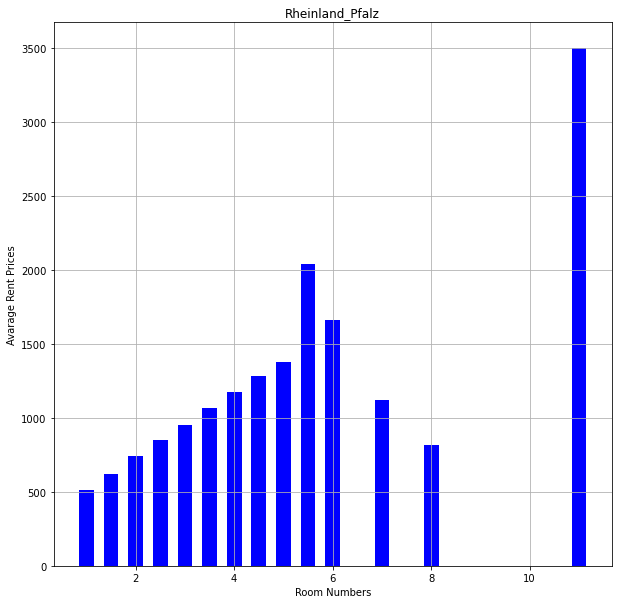

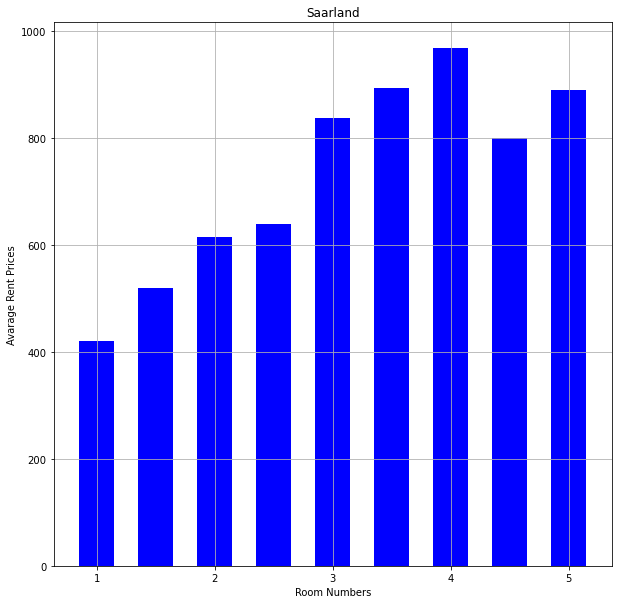

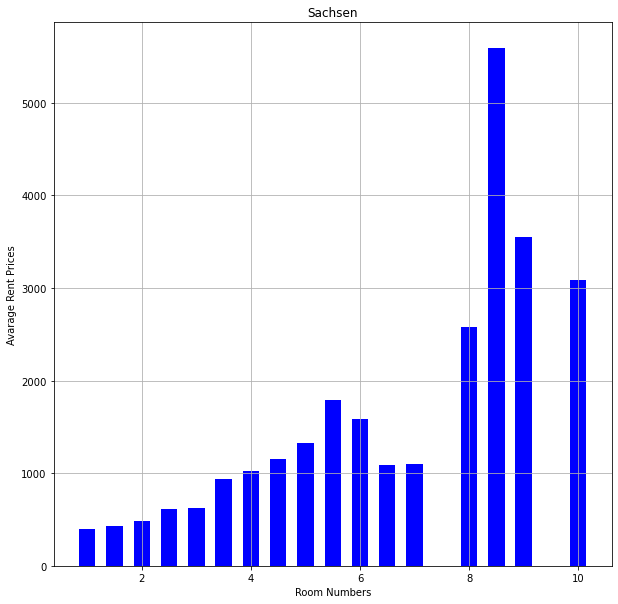

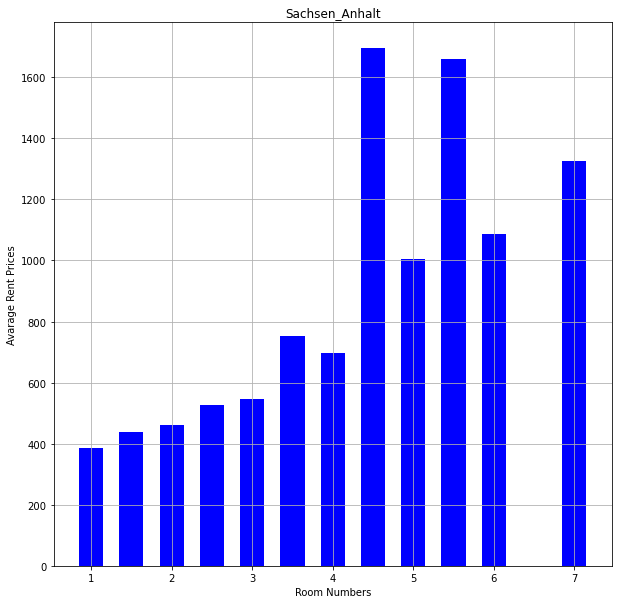

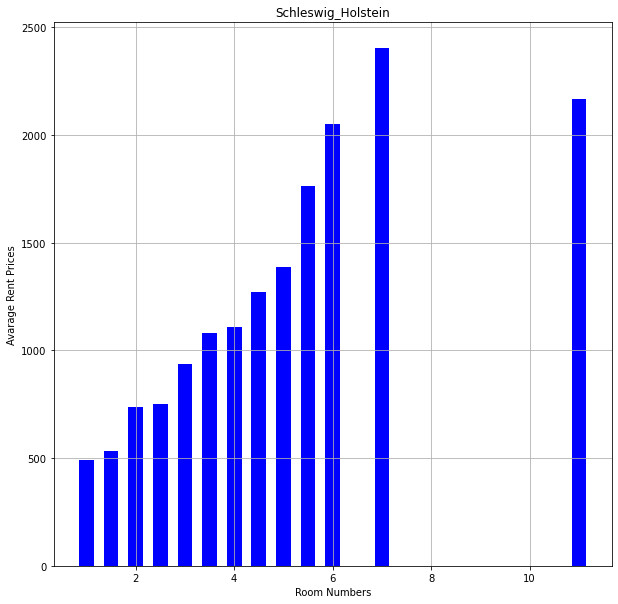

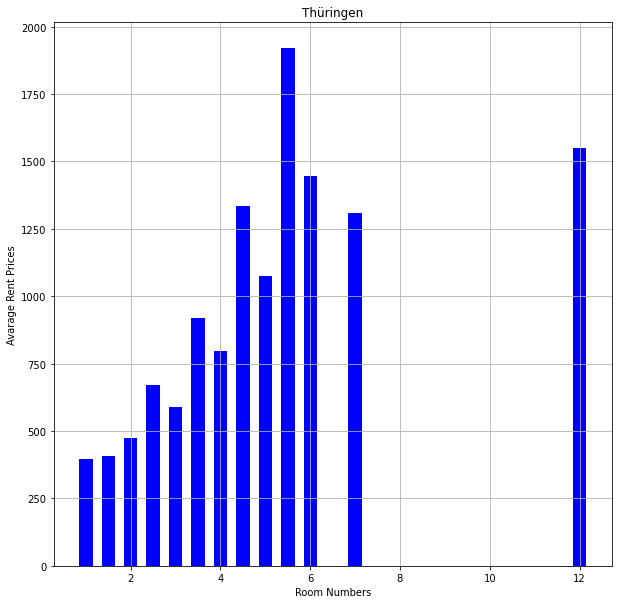

In [44]:
# Avarage Room Number Corresponding the Avarage Prices For Each State 


for i in Unique_States.flatten():
    plt.figure()
    plt.title(i)
    for j in Unique_RoomNo:
        Ind_Values = RentList[ RentList['Region']== i ].index.values # Get States List Index
        Mean_Prices_to_use_states = RentList.loc[Ind_Values] # State List
        Ind_Values = Mean_Prices_to_use_states[ Mean_Prices_to_use_states['Room Numbers']== j ].index.values # Room No List Index based State
        Mean_Prices = RentList.iloc[Ind_Values]
        #print(Mean_Prices)
        Mean_Val = Mean_Prices['Total Rent'].mean()
        plt.bar(j, Mean_Val, 0.3, color='blue')
    plt.grid()  
    plt.xlabel('Room Numbers')
    plt.ylabel('Avarage Rent Prices')
    
   
        
    
      